In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Importing training and test dataset**

In [28]:
train_dat = '/kaggle/input/terrain-recognition/Data Main/train'
test_dat = '/kaggle/input/terrain-recognition/Data Main/test'
val_dat = '/kaggle/input/terrain-recognition/Data Main/val'
#Preprocessing parameters
batch_size = 64
img_size = (150, 150)

data generators for training and testing data

In [29]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dat,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'

)

Found 31571 images belonging to 4 classes.


In [30]:
test_generator = test_datagen.flow_from_directory(
    test_dat,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 6769 images belonging to 4 classes.


In [31]:
validation_generator = test_datagen.flow_from_directory(
    val_dat,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 6765 images belonging to 4 classes.


MODEL ARCHITECTURE

In [32]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape =(150,150,3)),
#     layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
#     layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
#     layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
#     layers.Dropout(0.5),
    layers.Dense(4, activation = 'Softmax')
])
# from tensorflow.keras.applications import VGG16

# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# # Freeze the base layers
# for layer in base_model.layers:
#     layer.trainable = False

# model = models.Sequential([
#     base_model,
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(4, activation='softmax')
# ])

**COMPILING THE MODEL**

In [33]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

TRAINING

In [34]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch = batch_size,
    epochs = epochs,
    validation_data = test_generator,
    validation_steps = batch_size
)

Epoch 1/20
64/64 [==============================] - 75s 1s/step - loss: 0.8276 - accuracy: 0.6443 - val_loss: 0.5256 - val_accuracy: 0.7905
Epoch 2/20
64/64 [==============================] - 70s 1s/step - loss: 0.5458 - accuracy: 0.7734 - val_loss: 0.4320 - val_accuracy: 0.8262
Epoch 3/20
64/64 [==============================] - 69s 1s/step - loss: 0.4601 - accuracy: 0.8130 - val_loss: 0.3774 - val_accuracy: 0.8425
Epoch 4/20
64/64 [==============================] - 69s 1s/step - loss: 0.4169 - accuracy: 0.8279 - val_loss: 0.3832 - val_accuracy: 0.8523
Epoch 5/20
64/64 [==============================] - 68s 1s/step - loss: 0.4652 - accuracy: 0.8171 - val_loss: 0.3548 - val_accuracy: 0.8608
Epoch 6/20
64/64 [==============================] - 66s 1s/step - loss: 0.3961 - accuracy: 0.8381 - val_loss: 0.3340 - val_accuracy: 0.8679
Epoch 7/20
64/64 [==============================] - 67s 1s/step - loss: 0.3598 - accuracy: 0.8555 - val_loss: 0.3506 - val_accuracy: 0.8652
Epoch 8/20
64/64 [==

In [35]:
model.save('Vis8.h5')

In [36]:
predictions = model.predict(validation_generator)

106/106 [==============================] - 37s 345ms/step


In [37]:
test_loss, test_accuracy = model.evaluate(validation_generator, batch_size = batch_size)

106/106 [==============================] - 31s 291ms/step - loss: 0.2398 - accuracy: 0.9072


In [38]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.23976609110832214
Test Accuracy: 0.9071692824363708


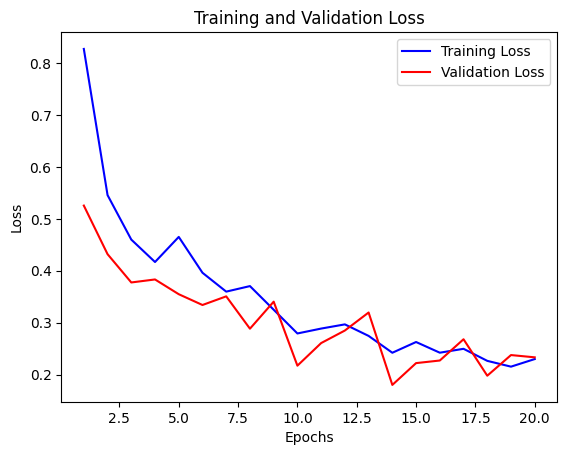

In [39]:
import matplotlib.pyplot as plt

# Assuming you have collected training and validation loss values in a 'history' object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
